# Decision tree demonstration

This notebook offers some data visualization to help illustrate how decision trees classify data using the iris dataset as an example.

## Notebook set-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgb
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## 1. Load data

In [2]:
data = load_iris(as_frame = True)
data_df = data.frame
data_df.replace({'target': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}}, inplace=True)
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Train a decision tree classifier

In [3]:
model = DecisionTreeClassifier()
result = model.fit(data_df.drop(columns='target'), data_df['target'])

## 3. Plot the tree

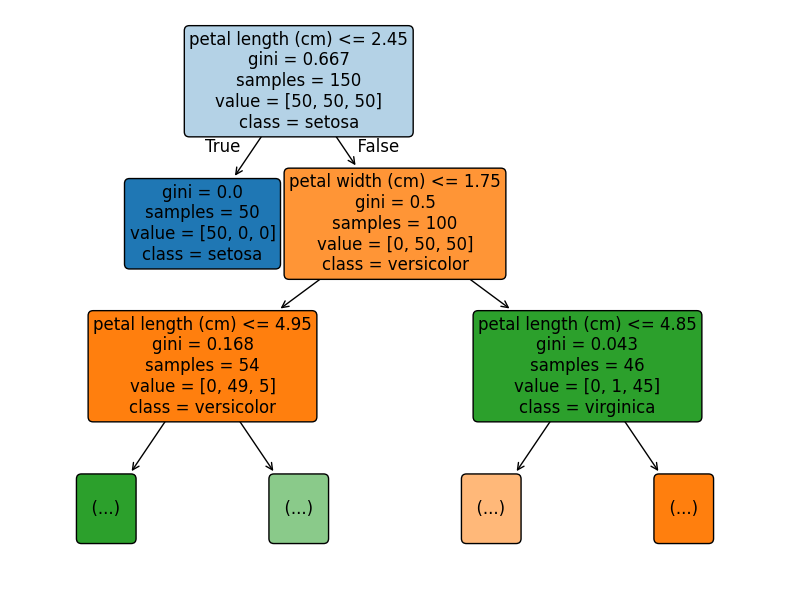

In [4]:
fig = plt.figure(figsize=(8,6))

colors = ['tab:blue', 'tab:orange', 'tab:green']

artists = tree.plot_tree(
    model,
    feature_names=list(data_df.columns[:-1]),
    class_names=data.target_names,
    max_depth=2,
    filled=True,
    rounded=True,
    fontsize=12
)

for artist, impurity, value in zip(artists, model.tree_.impurity, model.tree_.value):

    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity# for N colors: f = impurity * N/(N-1) if N>1 else 0

    if artist.get_bbox_patch():
        artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))

plt.tight_layout()
plt.show()

## 4. Plot feature distributions at each node

### 4.1. Root

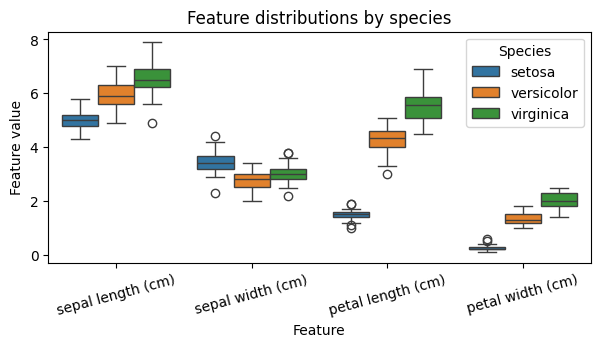

In [5]:
long_df = pd.melt(data_df, id_vars='target', var_name='feature', value_name='value')

fig = plt.figure(figsize=(7,3))
plt.title('Feature distributions by species')
sns.boxplot(data=long_df, x='feature', y='value', hue='target')
plt.xlabel('Feature')
plt.ylabel('Feature value')
plt.xticks(rotation=15)
plt.legend(title='Species', loc='upper right')
plt.show()

### 4.2. Depth = 1 (right split)

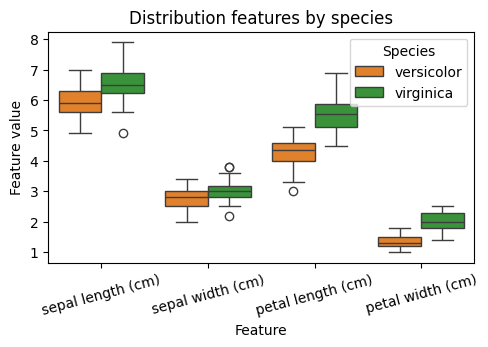

In [6]:
data_df = data_df[data_df['petal length (cm)'] > 2.45]
long_df = pd.melt(data_df, id_vars='target', var_name='feature', value_name='value')

fig = plt.figure(figsize=(5.5,3))
colors = {"versicolor": "tab:orange", "virginica": "tab:green"}
plt.title('Distribution features by species')
sns.boxplot(data=long_df, x='feature', y='value', hue='target', palette=colors)
plt.xlabel('Feature')
plt.ylabel('Feature value')
plt.xticks(rotation=15)
plt.legend(title='Species', loc='upper right')
plt.show()